In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Ec = pd.read_csv(r"C:\Users\91967\OneDrive\Pictures\Python Project\archive\E-commerece sales data 2024.csv")
Pd = pd.read_csv(r"C:\Users\91967\OneDrive\Pictures\Python Project\archive\product_details.csv")
cd = pd.read_csv(r"C:\Users\91967\OneDrive\Pictures\Python Project\archive\customer_details.csv")

# Understand the Structure of Data 

In [3]:
print(Ec.head())
print(Pd.head())
print(cd.head())


   user id                        product id Interaction type  \
0      1.0  4c69b61db1fc16e7013b43fc926e502d         purchase   
1      2.0  66d49bbed043f5be260fa9f7fbff5957             view   
2      3.0  2c55cae269aebf53838484b0d7dd931a             like   
3      4.0  18018b6bc416dab347b1b7db79994afa             view   
4      5.0  e04b990e95bf73bbe6a3fa09785d7cd0             like   

        Time stamp  Unnamed: 4  
0  10/10/2023 8:00         NaN  
1  11/10/2023 8:00         NaN  
2  12/10/2023 8:00         NaN  
3  13/10/2023 8:00         NaN  
4  14/10/2023 8:00         NaN  
                           Uniqe Id  \
0  4c69b61db1fc16e7013b43fc926e502d   
1  66d49bbed043f5be260fa9f7fbff5957   
2  2c55cae269aebf53838484b0d7dd931a   
3  18018b6bc416dab347b1b7db79994afa   
4  e04b990e95bf73bbe6a3fa09785d7cd0   

                                        Product Name  Brand Name  Asin  \
0  DB Longboards CoreFlex Crossbow 41" Bamboo Fib...         NaN   NaN   
1  Electronic Snap Circuits 

In [4]:
# Droping the columns with full null Missing Values 

print( Ec.columns[Ec.isnull().all()])
Ec.dropna(axis=1, how='all', inplace=True)

print( Pd.columns[Pd.isnull().all()])
Pd.dropna(axis=1, how='all', inplace=True)

print( cd.columns[cd.isnull().all()])
cd.dropna(axis=1, how='all', inplace=True)


Index(['Unnamed: 4'], dtype='object')
Index(['Brand Name', 'Asin', 'List Price', 'Quantity', 'Sku', 'Stock',
       'Product Details', 'Dimensions', 'Color', 'Ingredients',
       'Direction To Use', 'Size Quantity Variant', 'Product Description'],
      dtype='object')
Index([], dtype='object')


In [8]:
# Checking for missing values in each dataset
print("\n ec:", Ec.isnull().sum())
print("\n cd:", cd.isnull().sum())
print("\n Pd:" ,Pd.isnull().sum())


    


 ec: user id             295
product id          295
Interaction type    423
Time stamp          295
dtype: int64

 cd: Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

 Pd: Uniqe Id                    0
Product Name                0
Category                  830
Upc Ean Code             9968
Selling Price             107
Model Number             1772
About Product             273
Product Specification    1632
Technical Details         790
Shipping Weight          1138
Product Dimensions       9523
Image                     

In [13]:
# For customer_details, fill missing numeric values with the mean and categorical values with the mode.
for column in cd.columns:
    if cd[column].dtype == 'object':  
        mode_value = cd[column].mode()[0]  
        cd.loc[:, column] = cd[column].fillna(mode_value)
    else: 
        mean_value = cd[column].mean()  
        cd.loc[:, column] = cd[column].fillna(mean_value)

In [12]:
# For product_details, assuming missing values in 'List Price' and other numeric fields, fill with mean
# and categorical fields with mode
for column in Pd.columns:
    if Pd[column].dtype == 'object':  
        mode_value = Pd[column].mode()[0] 
        Pd.loc[:, column] =Pd[column].fillna(mode_value)
    else:  
        mean_value = Pd[column].mean() 
        Pd.loc[:, column] = Pd[column].fillna(mean_value)

In [16]:
# check for missing values 
print("\n Product Details Missing Values: ", Pd.isnull().sum())
print("\n Customer Details Missing Values: ", cd.isnull().sum())


 Product Details Missing Values:  Uniqe Id                 0
Product Name             0
Category                 0
Upc Ean Code             0
Selling Price            0
Model Number             0
About Product            0
Product Specification    0
Technical Details        0
Shipping Weight          0
Product Dimensions       0
Image                    0
Variants                 0
Product Url              0
Is Amazon Seller         0
dtype: int64

 Customer Details Missing Values:  Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: 

## Exploratory Data Analysis

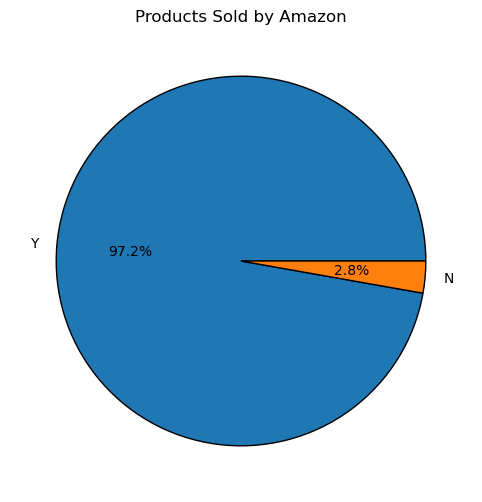

In [21]:
plt.figure(figsize=(8, 6))
Pd['Is Amazon Seller'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
   wedgeprops={'edgecolor': 'black'}
)
plt.title('Products Sold by Amazon')
plt.ylabel('') 
plt.show()

In [23]:
# relation ship between sales_data and customer_details
sales_customer = pd.merge(Ec, cd, left_on='user id', right_on='Customer ID', how='inner')

# merge sales_customer and product_details
sales_customer_product = pd.merge(sales_customer,Pd, left_on='product id', right_on='Uniqe Id', how='inner')

# Display columns in the merged DataFrame
print("Sales_customer_product_column :",sales_customer_product.columns)


Sales_customer_product_column : Index(['user id', 'product id', 'Interaction type', 'Time stamp',
       'Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category_x',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Uniqe Id', 'Product Name',
       'Category_y', 'Upc Ean Code', 'Selling Price', 'Model Number',
       'About Product', 'Product Specification', 'Technical Details',
       'Shipping Weight', 'Product Dimensions', 'Image', 'Variants',
       'Product Url', 'Is Amazon Seller'],
      dtype='object')


Text(0, 0.5, 'Frequency')

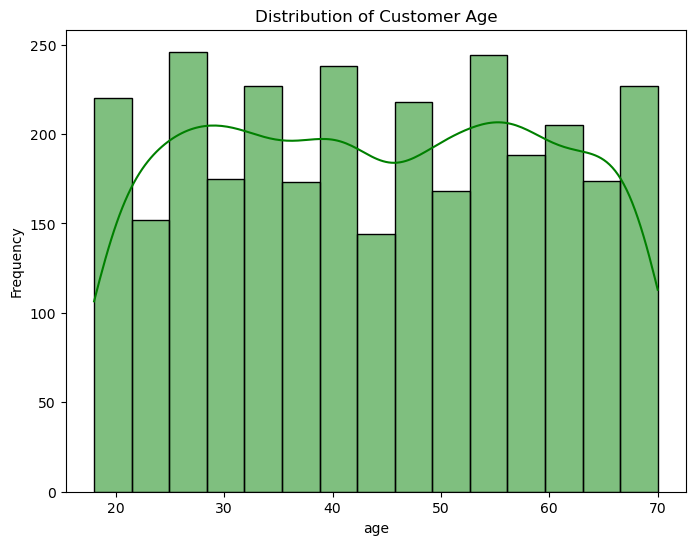

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(data=sales_customer_product, x="Age",kde = True,color ="Green")
plt.title('Distribution of Customer Age')
plt.xlabel('age')
plt.ylabel('Frequency')

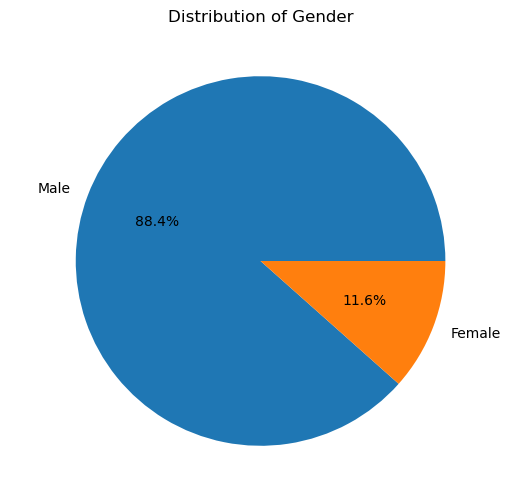

In [30]:
plt.figure(figsize=(8, 6))
sales_customer_product['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Gender')
plt.ylabel(' ')
plt.show()

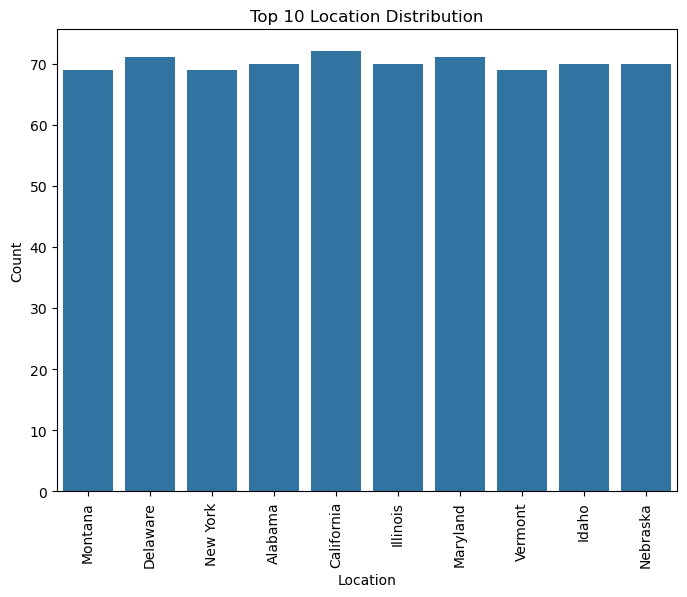

In [35]:
# Calculate the top 10 locations by count
top_locations = sales_customer_product['Location'].value_counts().nlargest(10).index

# Filter the data to include only the top 10 locations
filtered_data = sales_customer_product[sales_customer_product['Location'].isin(top_locations)]

plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_data, x="Location")
plt.title("Top 10 Location Distribution")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


C:\Users\91967\AppData\Local\Temp\ipykernel_4212\1243352290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sales_customer_product, x="Category_x",order =descending_order  ,palette ='Set2')


Text(0, 0.5, 'Count')

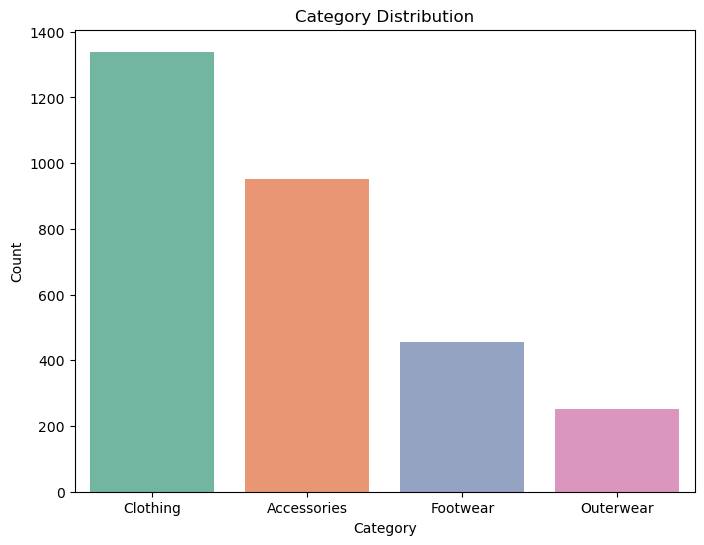

In [40]:
descending_order = sales_customer_product['Category_x'].value_counts().index

plt.figure(figsize=(8, 6))
sns.countplot(data=sales_customer_product, x="Category_x",order =descending_order  ,palette ='Set2')
plt.title("Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")

Text(0, 0.5, 'Count of Members')

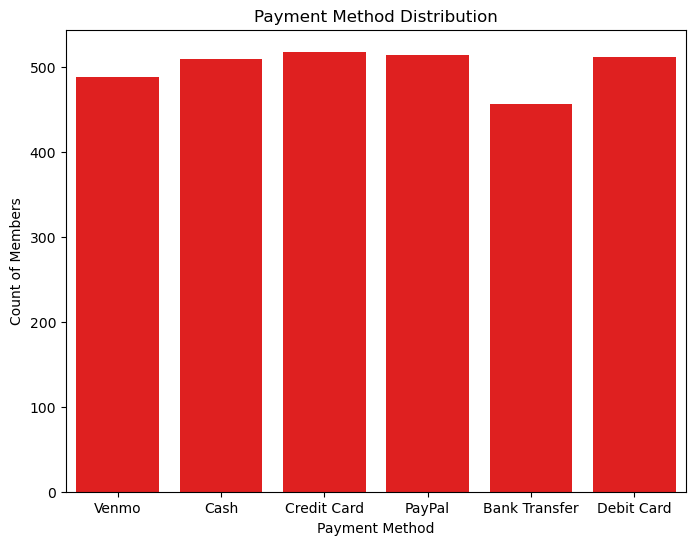

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(data=sales_customer_product, x="Payment Method",color ="red")
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Count of Members")


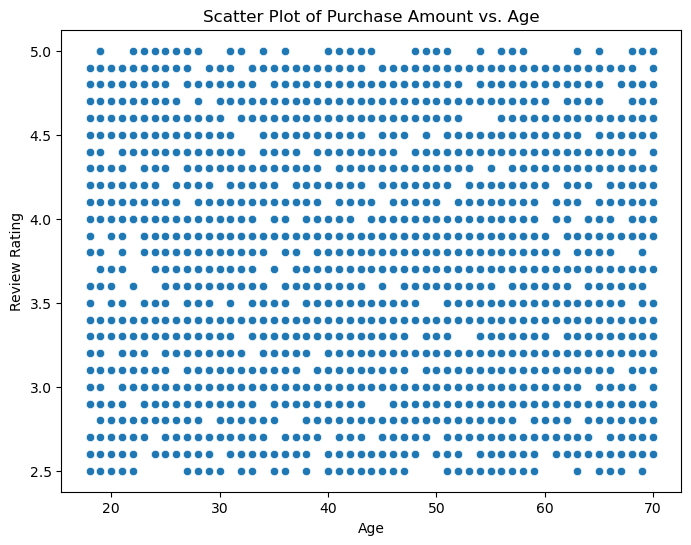

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sales_customer_product, x="Age", y="Review Rating")
plt.title("Scatter Plot of Purchase Amount vs. Age")
plt.xlabel("Age")
plt.ylabel("Review Rating")
plt.show()